# 第 5 章　正态线性模型｜用 Python 动手学统计学

## 第 1 节　含有单个连续型解释变量的模型（一元回归）

### 1. 环境准备

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

### 2. 实现：读入数据并绘制其图形

In [2]:
# 读入数据
url = "https://raw.github.com/pineapple-666/Learn-Statistics-with-Python/main/data/5-1-1-beer.csv"
beer = pd.read_csv(url)
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


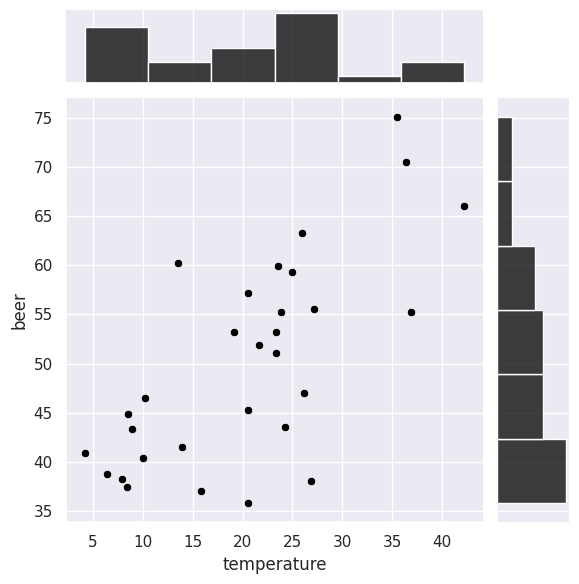

In [3]:
# 绘制图像
sns.jointplot(x = "temperature", y = "beer",
              data = beer, color = 'black')

### 4. 实现：使用 statsmodels 实现模型化

In [4]:
# 建模
lm_model = smf.ols(formula = "beer ~ temperature",
                   data = beer).fit()

### 5. 实现：打印估计结果并检验系数

In [7]:
# 打印估计的结果
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.11e-05
Time:                        21:28:11   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      

### 7. 实现：使用 AIC 进行模型选择

In [8]:
# 空模型
null_model = smf.ols("beer ~ 1", data = beer).fit()

In [9]:
# 空模型的 AIC
null_model.aic

np.float64(227.94194972563105)

In [10]:
# 含有解释变量的模型的 AIC
lm_model.aic

np.float64(208.90902935575437)

In [11]:
# 对数似然度 llf= log-likelihood function
lm_model.llf

np.float64(-102.45451467787719)

In [12]:
# 解释变量的个数
lm_model.df_model

1.000

In [13]:
# AIC
-2*(lm_model.llf - (lm_model.df_model + 1))

np.float64(208.90902935575437)

### 9. 实现：用 seaborn 绘制回归直线

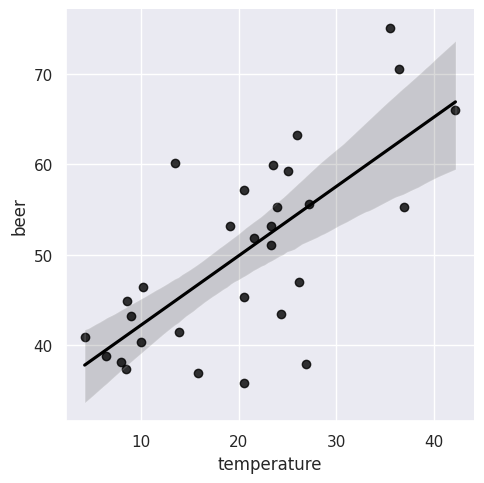

In [14]:
#lm = linear model
sns.lmplot(x = "temperature", y = "beer", data = beer,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

### 10. 实现：使用模型进行预测

In [15]:
# 拟合值
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [16]:
# 预测
lm_model.predict(pd.DataFrame({"temperature":[0]}))

,0
0,34.610215


In [17]:
# 气温为 0 度时的预测值等于截距
lm_model.params

,0
Intercept,34.610215
temperature,0.765428


In [18]:
# 预测
lm_model.predict(pd.DataFrame({"temperature":[20]}))

,0
0,49.918767


In [19]:
# 不使用 predict 函数进行预测
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

/tmp/ipython-input-3124566662.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0 = lm_model.params[0]
/tmp/ipython-input-3124566662.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1 = lm_model.params[1]


np.float64(49.918767010950546)

### 11. 实现：获取残差

In [20]:
# 获得残差
resid = lm_model.resid
resid.head(3)

,0
0,-5.001481
1,5.554095
2,-1.864491


In [21]:
# 计算拟合值
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

,temperature
0,50.301481
1,53.745905
2,42.264491


In [22]:
# 获得拟合值
lm_model.fittedvalues.head(3)

,0
0,50.301481
1,53.745905
2,42.264491


In [23]:
# 手动计算残差
(beer.beer - y_hat).head(3)

,0
0,-5.001481
1,5.554095
2,-1.864491


### 13. 实现：决定系数

In [26]:
# 决定系数
mu = np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2) / np.sum((y - mu)**2)

np.float64(0.5039593230611875)

In [27]:
lm_model.rsquared

np.float64(0.5039593230611858)

In [28]:
np.sum((yhat - mu)**2) + sum(resid**2)

np.float64(3277.114666666671)

In [29]:
np.sum((y - mu)**2)

np.float64(3277.1146666666655)

In [31]:
1 - np.sum(resid**2) / np.sum((y - mu)**2)

np.float64(0.5039593230611857)

### 15. 实现：修正决定系数

In [32]:
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n - s - 1)) /
    (np.sum((y - mu)**2) / (n - 1)))

np.float64(0.48624358459908523)

In [33]:
lm_model.rsquared_adj

np.float64(0.48624358459908534)

### 16. 实现：残差的直方图和散点图

/tmp/ipython-input-3278241408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color = 'black')


<Axes: ylabel='Density'>

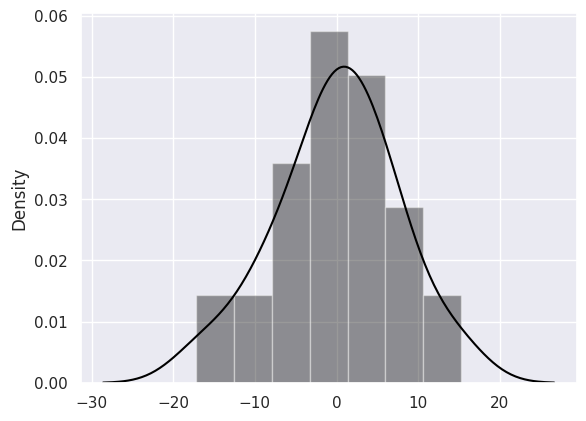

In [34]:
# 残差的直方图
sns.distplot(resid, color = 'black')

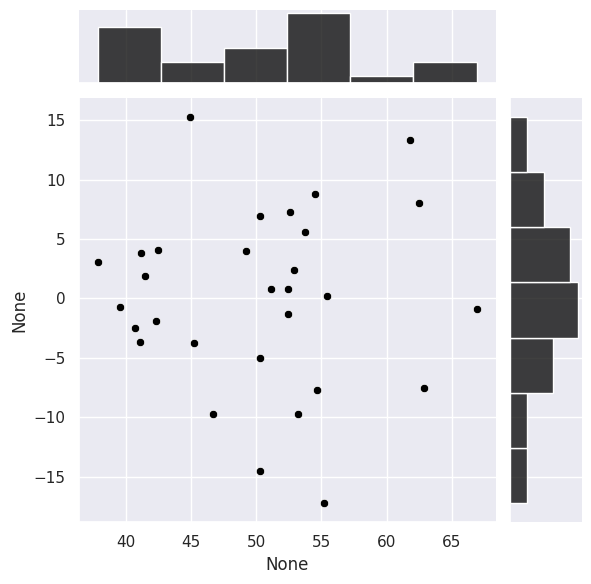

In [36]:
# 残差的散点图
sns.jointplot(x = lm_model.fittedvalues, y = resid,
              joint_kws={"color": "black"},
              marginal_kws={"color": "black"})

### 18. 实现：分位图

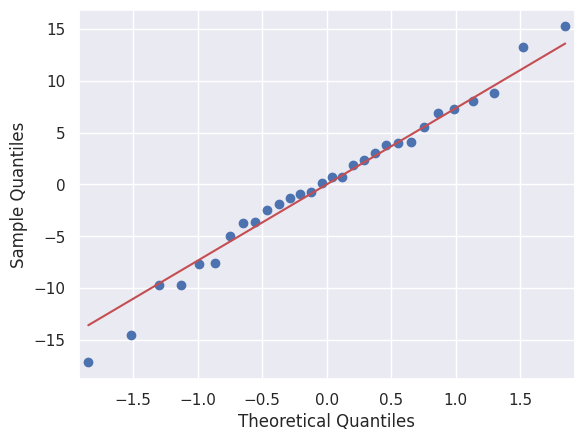

In [37]:
# 分位图
# 分位图是用来比较理论分位数（theoretical quantiles）与实际分位数（sample quantiles）的散点图，也叫 Q-Q 图。Q 是 Quantile 的缩写。s =standarized
fig = sm.qqplot(resid, line = "s")

In [38]:
# 递增排列
resid_sort = resid.sort_values()
resid_sort.head()

,0
3,-17.200217
21,-14.501481
12,-9.710106
4,-9.703971
10,-7.664418


In [39]:
# 最小的数据所在位置
1 / 31

0.032

In [40]:
# 按样本容量变换为 0 到 1 的范围, 得到理论累积概率
#
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [41]:
# 累积概率对应的百分位数
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

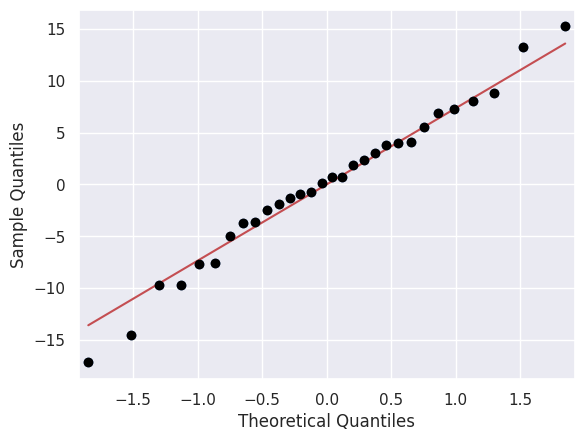

In [42]:
# 参考: 横轴为理论分位数, 纵轴为已排序的实际数据, 绘出的散点图就是分位图
fig = sm.qqplot(resid, line = "s")

plt.plot(stats.norm.ppf(cdf), resid_sort, "o", color = "black")

### 19. 根据 summary 函数的输出分析残差

In [43]:
# 打印估计的结果
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.11e-05
Time:                        21:46:13   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

峰度的数学式如下：
Durbin-Watson 表示残差的自相关程度，如果它的值在 2 附近，就
说明没什么问题。在分析时间序列的数据时必须判断它是否在 2 附
近。
如果残差自相关，系数的 检验结果便不可信，这个现象叫作伪回归。
如果 Durbin-Watson 统计量远大于 2，就需要使用广义最小二乘法
进一步讨论了。